In [79]:
import pandas as pd #importing all important packagages
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.svm import LinearSVC, SVC
import skimage.feature
from tensorflow.keras.optimizers import Adam

**Task4.1 SVM**

In [42]:

data = np.load("wineData.npy")
labels = np.load("wineLabels.npy")

In [43]:
print(data.shape)

(178, 13)


In [44]:
#splitting data to train and test
training_data = data[0:142]
testing_data = data[142:178]

training_labels = labels[0:142]
testing_labels = labels[142:178]

In [55]:
#standardising the data

scaler = StandardScaler()

scaler.fit(data)

scaler_train = scaler.transform(training_data)

scaler_test = scaler.transform(testing_data)

In [56]:
#create a svm
svc = SVC()

svc.fit(scaler_train,training_labels)
test_predictions = svc.predict(scaler_test)

score = svc.score(scaler_test,testing_labels) * 100

print(score)
print(test_predictions)

100.0
[1 1 2 0 0 2 0 2 2 1 2 1 0 1 1 2 1 1 0 1 0 1 1 1 2 0 1 2 0 0 1 0 1 1 0 2]


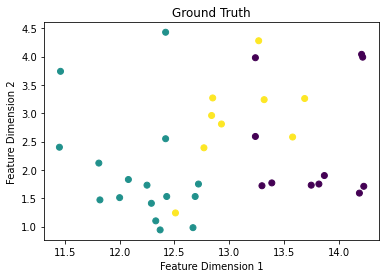

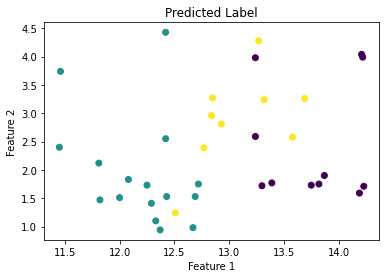

In [57]:
                                                                                       
plt.scatter(testing_data[:,0], testing_data[:,1], marker = 'o', c = testing_labels)  
plt.xlabel("Feature Dimension 1")
plt.ylabel("Feature Dimension 2")
plt.title('Ground Truth')
plt.show() 
                                                                                    
plt.scatter(testing_data[:,0], testing_data[:,1], marker = 'o', c = test_predictions)  
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")                       
plt.title('Predicted Label')
plt.show() 

**Task 4.2 NN**

In [58]:
#Fully connected NN
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(training_labels)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())


In [59]:
#training the model
history = model.fit(scaler_train, training_labels, epochs=200, validation_split=0.2, verbose=1)
model.summary()

Epoch 1/200
4/4 [==============================] - 1s 66ms/step - loss: 1.1262 - sparse_categorical_accuracy: 0.2920 - val_loss: 1.1464 - val_sparse_categorical_accuracy: 0.2069
Epoch 2/200
4/4 [==============================] - 0s 17ms/step - loss: 1.1191 - sparse_categorical_accuracy: 0.2743 - val_loss: 1.1377 - val_sparse_categorical_accuracy: 0.2414
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1127 - sparse_categorical_accuracy: 0.2920 - val_loss: 1.1275 - val_sparse_categorical_accuracy: 0.2069
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 1.1057 - sparse_categorical_accuracy: 0.3186 - val_loss: 1.1198 - val_sparse_categorical_accuracy: 0.3448
Epoch 5/200
4/4 [==============================] - 0s 11ms/step - loss: 1.0997 - sparse_categorical_accuracy: 0.3894 - val_loss: 1.1133 - val_sparse_categorical_accuracy: 0.4138
Epoch 6/200
4/4 [==============================] - 0s 9ms/step - loss: 1.0934 - sparse_categorical_accuracy: 0

In [60]:
#Accuracy of testing scaler
results = model.evaluate(scaler_test, testing_labels)

print(f'Test scaler loss: {results[0]:0.2f}, accuracy: {results[1]*100:0.2f}%')

2/2 [==============================] - 0s 6ms/step - loss: 0.1530 - sparse_categorical_accuracy: 0.9722
Test scaler loss: 0.15, accuracy: 97.22%


2/2 [==============================] - 0s 6ms/step


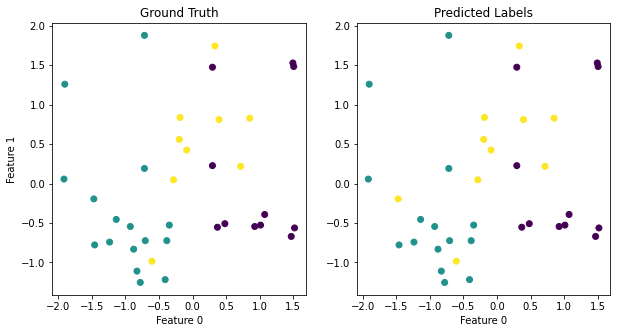

In [61]:
#plotting 
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(scaler_test[:,0], scaler_test[:,1], c = testing_labels, marker = 'o')
plt.ylabel('Feature 1')
plt.xlabel('Feature 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature 0')
plt.scatter(scaler_test[:,0], scaler_test[:,1], c = np.argmax(model.predict(scaler_test), axis=1), marker = 'o')
plt.show()

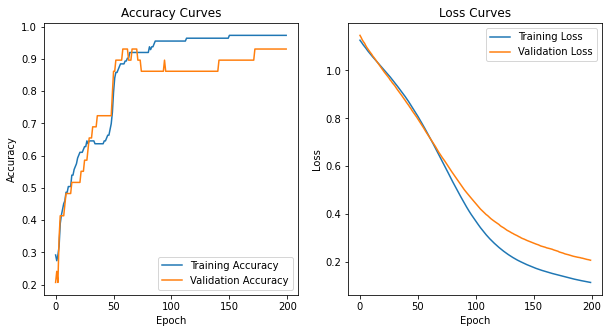

In [62]:
#plotting curves
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

**Task4.3 NN for Digit recognition**

In [63]:
(X_training, X_train_labels), (X_testing, X_test_labels) = tf.keras.datasets.mnist.load_data()

In [66]:
X_reshape_tr = X_training.reshape(X_training.shape[0], 784)
X_reshape_ts = X_testing.reshape(X_testing.shape[0], 784)
print(X_reshape_tr)
print(X_reshape_ts)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [67]:
print(X_reshape_tr.shape)
print(X_train_labels.shape)
print(X_reshape_ts.shape)
print(X_test_labels.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [68]:
#Normalising the data
norm_train = X_reshape_tr/255
norm_test = X_reshape_ts/255

In [69]:
#Fully connected NN
model = tf.keras.Sequential(layers=[tf.keras.layers.Dense(6, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(len(np.unique(X_train_labels)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

history = model.fit(norm_train, X_train_labels, epochs=15, validation_split=0.2, verbose=1)
model.summary()

Epoch 1/15
1500/1500 [==============================] - 4s 2ms/step - loss: 1.5595 - sparse_categorical_accuracy: 0.4514 - val_loss: 0.8953 - val_sparse_categorical_accuracy: 0.6996
Epoch 2/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8203 - sparse_categorical_accuracy: 0.7297 - val_loss: 0.6863 - val_sparse_categorical_accuracy: 0.7851
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6383 - sparse_categorical_accuracy: 0.8042 - val_loss: 0.5465 - val_sparse_categorical_accuracy: 0.8360
Epoch 4/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5264 - sparse_categorical_accuracy: 0.8432 - val_loss: 0.4657 - val_sparse_categorical_accuracy: 0.8634
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4579 - sparse_categorical_accuracy: 0.8656 - val_loss: 0.4279 - val_sparse_categorical_accuracy: 0.8750
Epoch 6/15
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4204 - spars

In [70]:
#Model accuracy on label prediction
lables_prediction = np.argmax(model.predict(norm_test), axis=1)

results = model.evaluate(norm_test, X_test_labels)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')


313/313 [==============================] - 1s 1ms/step - loss: 0.3343 - sparse_categorical_accuracy: 0.9030
Test set loss: 0.33, test set accuracy: 90.30%


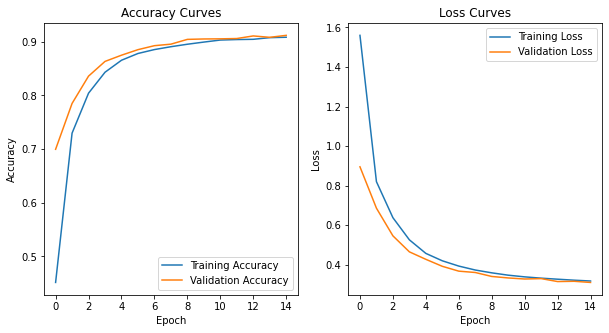

In [71]:
#Plotting curves
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

**Task4.4 CNN for Digit recognition**

In [80]:
expand_training = np.expand_dims(X_training, axis = 3)
expand_testing = np.expand_dims(X_testing, axis = 3)
print(expand_training.shape)
print(expand_testing.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [81]:
#Normalising expanded data
norm_training = expand_training/255
norm_testing = expand_testing/255

In [94]:
shape_input = norm_training.shape[1:]
print(shape_input)
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "relu",input_shape = shape_input))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.summary()

(28, 28, 1)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)  

In [96]:
loss_function =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#loss_fn = tf.keras.losses.binary_crossentropy(y_train,y_pred)
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss = loss_function,
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())


history = model.fit(norm_training, X_train_labels, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 54s 35ms/step - loss: 0.1116 - sparse_categorical_accuracy: 0.9657 - val_loss: 0.0768 - val_sparse_categorical_accuracy: 0.9758
Epoch 2/10
1500/1500 [==============================] - 52s 34ms/step - loss: 0.0486 - sparse_categorical_accuracy: 0.9849 - val_loss: 0.0439 - val_sparse_categorical_accuracy: 0.9867
Epoch 3/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0350 - sparse_categorical_accuracy: 0.9888 - val_loss: 0.0533 - val_sparse_categorical_accuracy: 0.9852
Epoch 4/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0264 - sparse_categorical_accuracy: 0.9917 - val_loss: 0.0385 - val_sparse_categorical_accuracy: 0.9896
Epoch 5/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0222 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.0473 - val_sparse_categorical_accuracy: 0.9861
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.

In [97]:

predicted_labels = np.argmax(model.predict(norm_testing), axis=1)

results = model.evaluate(norm_testing, X_test_labels)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')


313/313 [==============================] - 4s 11ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9912
Test set loss: 0.03, test set accuracy: 99.12%


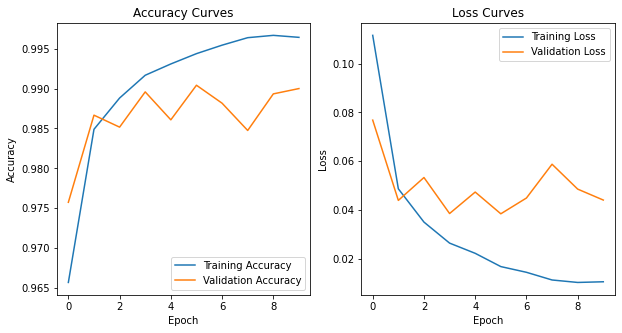

In [99]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()